In [17]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data
from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error
from math import sqrt

### Evaluating simple linear regressions on lemonade data with other features:


### 1. Create a dataframe from the csv at https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv


In [18]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv")
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


### 2. Make a baseline for predicting sales. (The mean is a good baseline)

In [19]:
df.Sales.mean()

25.323287671232876

Text(0.5, 1.0, 'Sales')

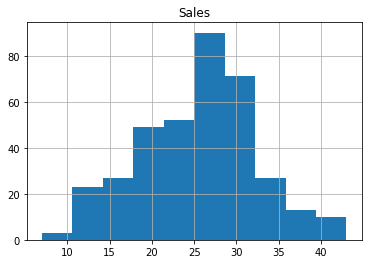

In [20]:
df.Sales.hist()
plt.title("Sales")

In [40]:
# Establish a baseline for predicting sales 
baseline = df.Sales.mean()
df['baseline'] = baseline
df['baseline_residual'] = round((df.baseline - df.Sales),2)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,baseline,baseline_residual
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,25.323288,15.32
1,1/2/17,Monday,28.9,1.33,15,0.5,13,25.323288,12.32
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,25.323288,10.32
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,25.323288,8.32
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,25.323288,7.32


### 3. Create a new dataframe to hold residuals.


In [41]:
residuals = pd.DataFrame()

### 4. Calculate the baseline residuals.


In [42]:
residuals['baseline'] = round(df.Sales.mean(),2)
residuals['baseline_residual'] = round((df.baseline - df.Sales),2)
residuals.head()

,baseline,baseline_residual
0,NaN,15.32
1,NaN,12.32
2,NaN,10.32
3,NaN,8.32
4,NaN,7.32


### 5. Use ols from statsmodels to create a simple linear regression (1 independent variable, 1 dependent variable) to predict sales using flyers.

In [43]:
# the df variable is lemonade data
# model = ols('sales ~ flyers', data=df).fit()
# predictions = model.predict(df.x)

In [44]:
model_1 = ols('Sales ~ Flyers', df).fit()

### 1. Use the .predict method from ols to produce all of our predictions. Add these predictions to the data



In [45]:
residuals["yhat1"] = model_1.predict()

### 2. Calculate that model's residuals.



In [46]:
residuals["model_1_residual"] = residuals.yhat1 - df.Sales

### 3. Evaluate that model's performance and answer if the model is significant.

In [50]:
baseline_sse = ((df.baseline_residual**2).sum())
model_sse = ((residuals.model_1_residual**2).sum())

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

Our model beats the baseline
It makes sense to evaluate this model more deeply.


### 4. Evaluate that model's performance and answer if the feature is significant.